# 1. *Installation*

In [2]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------- ----------------------- 262.1/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 2.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from transformers import pipeline
import re




# 2. *Aspect-Based Review Analysis with NLP and Clustering*

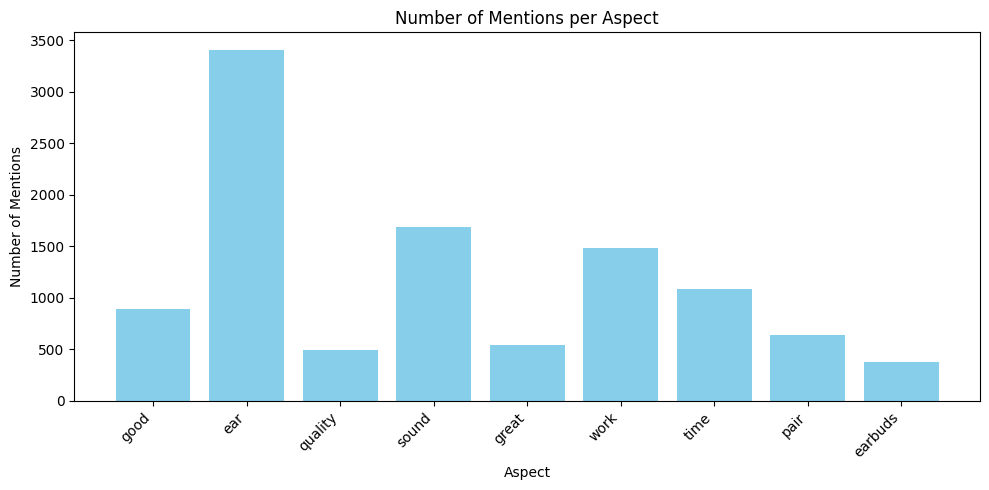

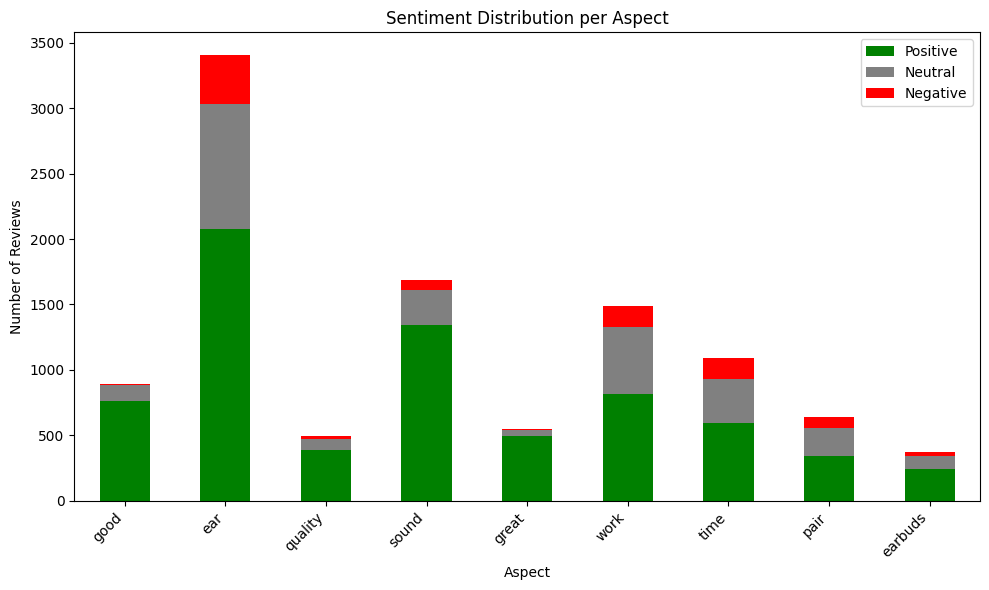

In [ ]:


# Function to perform sentiment analysis on each aspect and return a score between 1 and 5
def analyze_sentiment_aspect(aspect, review):
    if aspect.lower() in review.lower():
        blob = TextBlob(review)
        sentiment = blob.sentiment.polarity
        if sentiment > 0.1:
            return 4  # Positive (Score: 4 or 5)
        elif sentiment < -0.1:
            return 2  # Negative (Score: 1 or 2)
        else:
            return 3  # Neutral (Score: 3)
    return None

# Function to extract aspects using TF-IDF and KMeans clustering
def extract_aspects(reviews):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=10)
    X = vectorizer.fit_transform(reviews)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X)
    
    # Get top terms per cluster
    feature_names = np.array(vectorizer.get_feature_names_out())
    terms = []
    for i in range(3):  # Assuming we have 3 aspects to extract
        terms.append([feature_names[ind] for ind in np.argsort(kmeans.cluster_centers_[i])[-5:]])
    
    return terms

# Main function to perform ABA and plot the results
def perform_aba_analysis(file_path):
    # Read CSV file
    df = pd.read_csv(file_path)
    
    # Check if the file contains a 'Review' column
    if 'cleaned_text' not in df.columns:
        raise ValueError("The CSV file must have a 'Review' column")
    
    # Extract the reviews
    reviews = df['cleaned_text'].dropna().tolist()

    # Extract aspects
    aspects = extract_aspects(reviews)

    # Dictionary to store sentiment results per aspect
    sentiment_results = defaultdict(list)
    aspect_mentions = defaultdict(int)

    # Analyze sentiment for each aspect in each review
    for review in reviews:
        for aspect_group in aspects:
            for aspect in aspect_group:
                score = analyze_sentiment_aspect(aspect, review)
                if score:  # Only store if the aspect is mentioned
                    sentiment_results[aspect].append(score)
                    aspect_mentions[aspect] += 1

    # Plot the number of mentions per aspect
    plt.figure(figsize=(10, 5))
    plt.bar(aspect_mentions.keys(), aspect_mentions.values(), color='skyblue')
    plt.title('Number of Mentions per Aspect')
    plt.xlabel('Aspect')
    plt.ylabel('Number of Mentions')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    # Prepare data for the sentiment distribution plot
    sentiment_distribution = []
    for aspect, scores in sentiment_results.items():
        positive_count = scores.count(4) + scores.count(5)
        neutral_count = scores.count(3)
        negative_count = scores.count(1) + scores.count(2)
        sentiment_distribution.append([aspect, positive_count, neutral_count, negative_count])

    # Convert to DataFrame for easier plotting
    sentiment_df = pd.DataFrame(sentiment_distribution, columns=['Aspect', 'Positive', 'Neutral', 'Negative'])

    # Plot the sentiment distribution for each aspect
    sentiment_df.set_index('Aspect').plot(kind='bar', stacked=True, color=['green', 'gray', 'red'], figsize=(10, 6))
    plt.title('Sentiment Distribution per Aspect')
    plt.xlabel('Aspect')
    plt.ylabel('Number of Reviews')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    # Provide the path to your CSV file here
    file_path = r'D:\datathone_project\vader_cleaned_with_stars.csv'  
    perform_aba_analysis(file_path)


# 3. *Custom Aspect-Based Sentiment Analysis Using Keyword Mapping and TextBlob*

In [ ]:


#Customers are highly positive about comfort and sound quality, but some face issues with fit and value for money. Controls and design are less discussed, showing scope for innovation. Overall sentiment is strongly positive with a few improvement areas.

# 3. *Emotion-Aware Aspect-Based Sentiment Analysis using Hugging Face*

Device set to use cpu
c:\Users\Divy\AppData\Local\Programs\Python\Python313\Lib\site-packages\transformers\pipelines\text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(
C:\Users\Divy\AppData\Local\Temp\ipykernel_43940\3086331299.py:87: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Divy\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


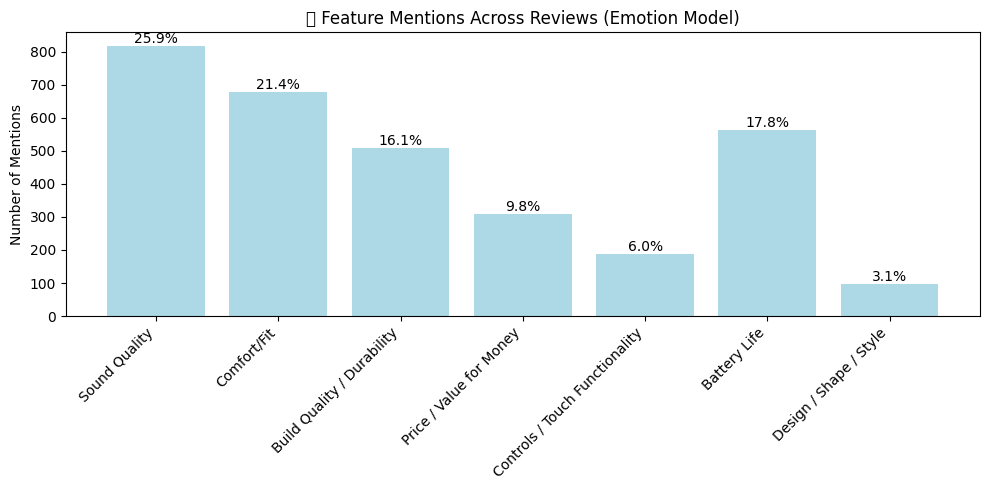

C:\Users\Divy\AppData\Local\Temp\ipykernel_43940\3086331299.py:121: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\Divy\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


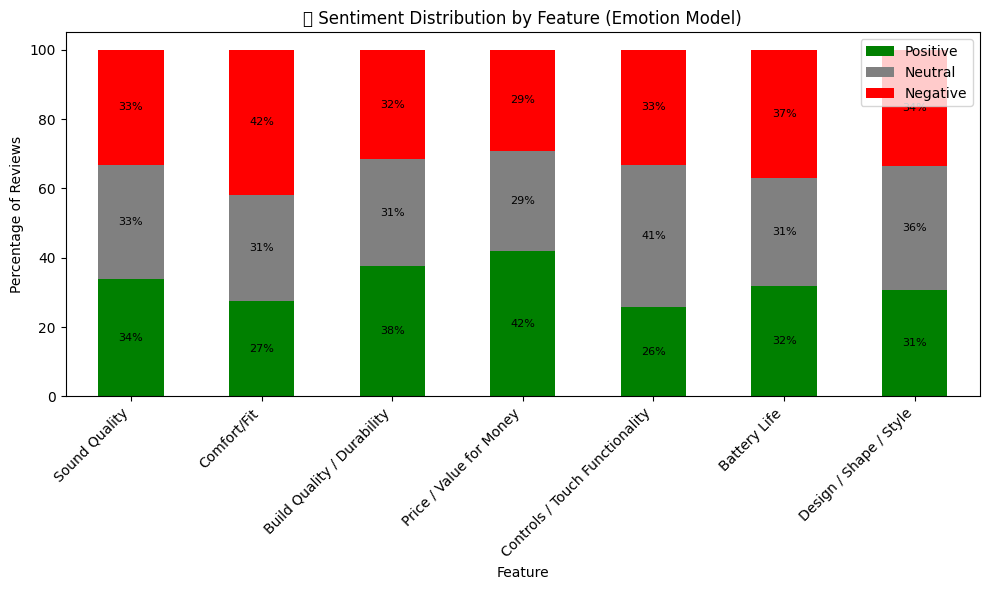

✅ Emotion-based ABA analysis completed!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from transformers import pipeline
import re


classifier = pipeline("text-classification", 
                      model="j-hartmann/emotion-english-distilroberta-base", 
                      return_all_scores=False)

# Emotion to sentiment cluster
emotion_to_sentiment = {
    'joy': 'Positive',
    'surprise': 'Positive',
    'neutral': 'Neutral',
    'sadness': 'Negative'
}

# Aspect keyword mapping
aspect_keywords = {
    1: ('Battery Life', ['battery', 'charge', 'charging', 'battery Life', 'long battery']),
    2: ('Sound Quality', ['sound', 'audio', 'bass', 'treble']),
    3: ('Comfort/Fit', ['fit', 'comfort', 'comfortable', 'ear']),
    4: ('Build Quality / Durability', ['build', 'durable', 'durability', 'broke', 'quality']),
    5: ('Design / Shape / Style', ['design', 'shape', 'style', 'look', 'appearance']),
    6: ('Price / Value for Money', ['price', 'cost', 'value', 'expensive', 'cheap']),
    7: ('Controls / Touch Functionality', ['controls', 'buttons', 'touch', 'tap', 'finger touch', 'pad']),
}

# Detect emotion using Hugging Face
def detect_emotion(text):
    try:
        return classifier(text[:512])[0]['label']
    except Exception as e:
        print(f"Error on: {text[:30]}... | {e}")
        return "neutral"

def perform_custom_aba(file_path):
    df = pd.read_csv(file_path)
    if 'cleaned_text' not in df.columns:
        raise ValueError("CSV file must contain a 'cleaned_text' column.")

    reviews = df['cleaned_text'].fillna('').tolist()
    feature_counts = defaultdict(int)
    sentiment_by_feature = defaultdict(list)

    feature_num_col = []
    sentiment_score_col = []

    for review in reviews:
        review_lower = review.lower()
        matched_features = []
        matched_sentiments = []

        # Step 1: Get emotion using model
        emotion_label = detect_emotion(review)
        sentiment_category = emotion_to_sentiment.get(emotion_label, 'Neutral')

        for number, (feature, keywords) in aspect_keywords.items():
            if any(re.search(rf"\b{re.escape(keyword)}\b", review_lower) for keyword in keywords):
                matched_features.append(number)
                matched_sentiments.append(sentiment_category)

                feature_counts[feature] += 1
                sentiment_by_feature[feature].append(sentiment_category)

        feature_num_col.append(matched_features if matched_features else None)
        sentiment_score_col.append(matched_sentiments if matched_sentiments else None)

    df['Feature_Number'] = feature_num_col
    df['Sentiment_Category'] = sentiment_score_col
    df.to_csv("aba_emotion_output.csv", index=False)

    # --- Plot 1: Feature Mention Frequency ---
    plt.figure(figsize=(10, 5))
    total_mentions = sum(feature_counts.values())
    bars = plt.bar(feature_counts.keys(), feature_counts.values(), color='lightblue')

    for bar, count in zip(bars, feature_counts.values()):
        percentage = (count / total_mentions) * 100
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{percentage:.1f}%", ha='center', va='bottom')

    plt.title("📊 Feature Mentions Across Reviews (Emotion Model)")
    plt.ylabel("Number of Mentions")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    # --- Plot 2: Sentiment Distribution Per Feature ---
    sentiment_df = pd.DataFrame(columns=['Feature', 'Positive', 'Neutral', 'Negative'])

    for feature, sentiments in sentiment_by_feature.items():
        pos = sentiments.count('Positive')
        neu = sentiments.count('Neutral')
        neg = sentiments.count('Negative')
        sentiment_df = pd.concat([sentiment_df, pd.DataFrame([{
            'Feature': feature,
            'Positive': pos,
            'Neutral': neu,
            'Negative': neg
        }])], ignore_index=True)

    sentiment_df.set_index('Feature', inplace=True)
    sentiment_pct = sentiment_df.div(sentiment_df.sum(axis=1), axis=0) * 100

    ax = sentiment_pct.plot(
        kind='bar', stacked=True, figsize=(10, 6),
        color=['green', 'gray', 'red']
    )

    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        if height > 5:
            x, y = p.get_xy()
            ax.text(x + width / 2, y + height / 2, f"{height:.0f}%", ha='center', va='center', fontsize=8)

    plt.title("📊 Sentiment Distribution by Feature (Emotion Model)")
    plt.ylabel("Percentage of Reviews")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    print("✅ Emotion-based ABA analysis completed!")

if __name__ == "__main__":
    file_path = r'D:\datathone_project\vader_cleaned_with_stars.csv'  # Update if needed
    perform_custom_aba(file_path)
